# Time Series Stock Forecast

In [5]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
#from prophet import Prophet
import yfinance as yf
from pandas_datareader import data as pdr

In [6]:
stock = 'AMGN'
start = '2020-01-01' 
end = '2024-01-11'
#df = pdr.get_data_yahoo(stock, start, end)
df = yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.shape

(1013, 6)

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,243.000000,243.190002,238.979996,240.100006,212.332336,2088000
2020-01-03,237.160004,240.259995,236.240005,238.470001,210.890839,1879000
2020-01-06,237.199997,240.449997,236.559998,240.300003,212.509201,1802800
2020-01-07,239.309998,240.000000,237.589996,238.039993,210.510544,1518900
2020-01-08,237.929993,239.580002,236.610001,238.220001,210.669754,2214700


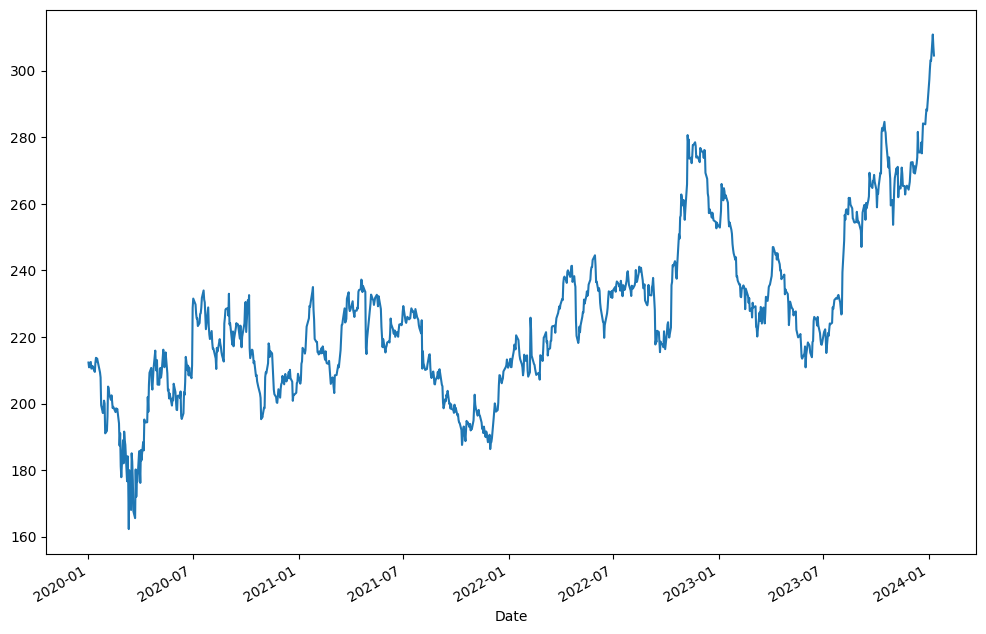

In [9]:
df['Adj Close'].plot(figsize=(12,8))
plt.show()

In [10]:
df = df.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
#df['ds'] = pd.to_datetime(df.index)
#df['y'] = pd.DataFrame(df['Adj Close'])

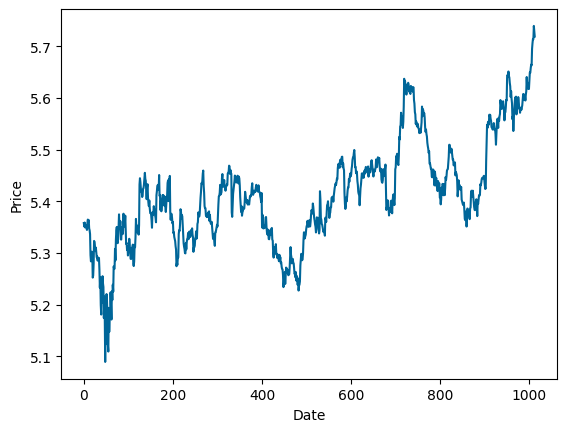

In [11]:
# Log Transform Data
df['y'] = pd.DataFrame(np.log(df['y']))

# plot data
ax = df['y'].plot(color='#006699');
ax.set_ylabel('Price');
ax.set_xlabel('Date');
plt.show()

In [12]:
# train test split
df_train = df[:740]
df_test = df[740:]

In [13]:
# Model Fitting
# instantiate the Prophet class
mdl = Prophet(interval_width=0.95, daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=24, freq='MS')

22:59:10 - cmdstanpy - INFO - Chain [1] start processing
22:59:10 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# instantiate the Prophet class
mdl = Prophet(interval_width=0.95, daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=24, freq='MS')

22:59:10 - cmdstanpy - INFO - Chain [1] start processing
22:59:11 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# generate the forecast
forecast = mdl.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
759,2024-08-01,6.736434,3.321865,10.195902
760,2024-09-01,6.726580,3.041924,10.548328
761,2024-10-01,6.711450,2.731405,10.818578
762,2024-11-01,6.821977,2.680213,11.340115
763,2024-12-01,6.905559,2.469205,11.771336


In [16]:
forecast['yhat_lower'].head()

0    5.301736
1    5.301096
2    5.301887
3    5.301986
4    5.300966
Name: yhat_lower, dtype: float64

/home/daniel/git/Stock_Analysis_For_Quant/Python_Stock/venv/lib64/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/daniel/git/Stock_Analysis_For_Quant/Python_Stock/venv/lib64/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


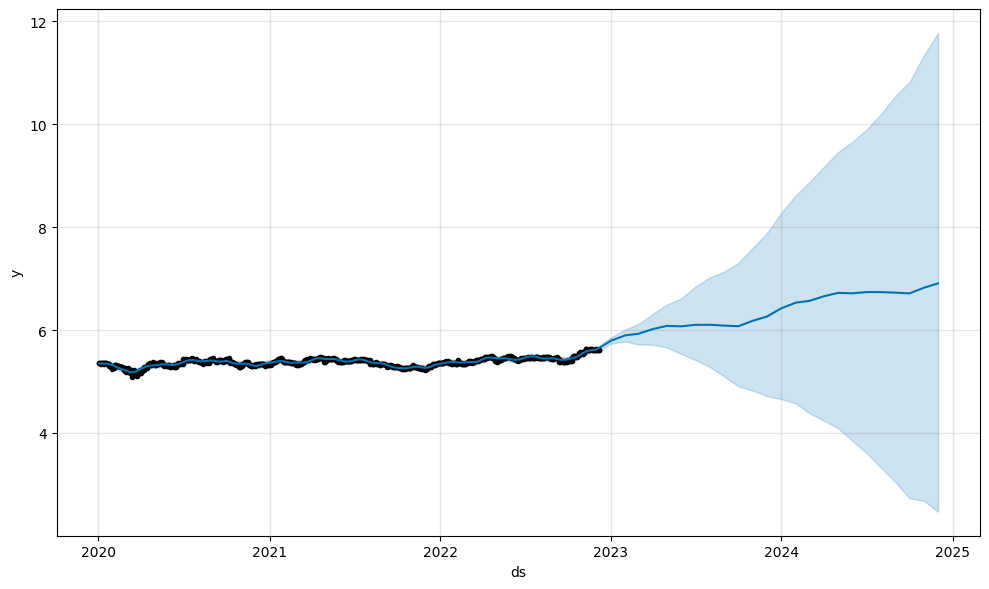

In [17]:
mdl.plot(forecast);
plt.show()

/home/daniel/git/Stock_Analysis_For_Quant/Python_Stock/venv/lib64/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/daniel/git/Stock_Analysis_For_Quant/Python_Stock/venv/lib64/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/daniel/git/Stock_Analysis_For_Quant/Python_Stock/venv/lib64/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecat

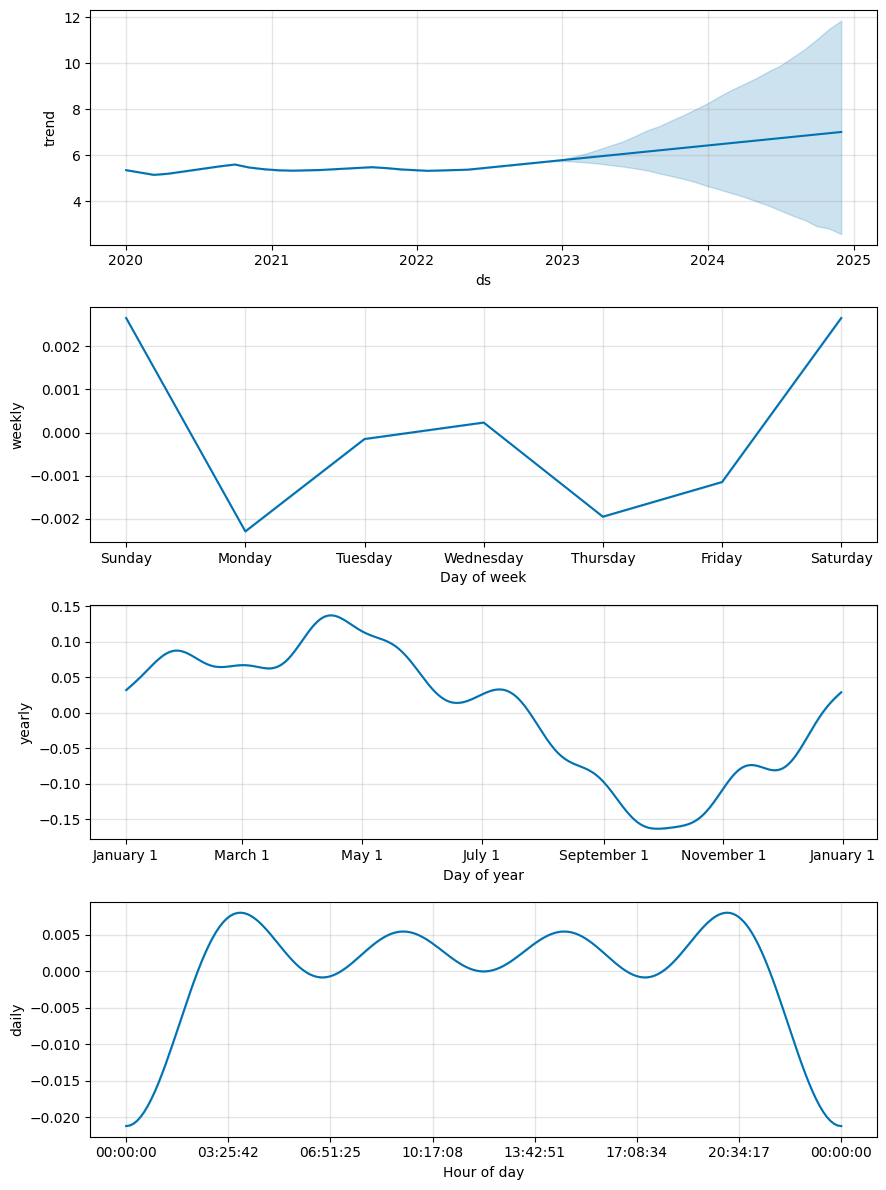

In [18]:
# plot time series components
mdl.plot_components(forecast)
plt.show()

In [19]:
import math
# retransform using e
y_hat = np.exp(forecast['yhat'][740:])
y_true = np.exp(df['y'])
 
# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 171141.35 MSE (413.69 RMSE)


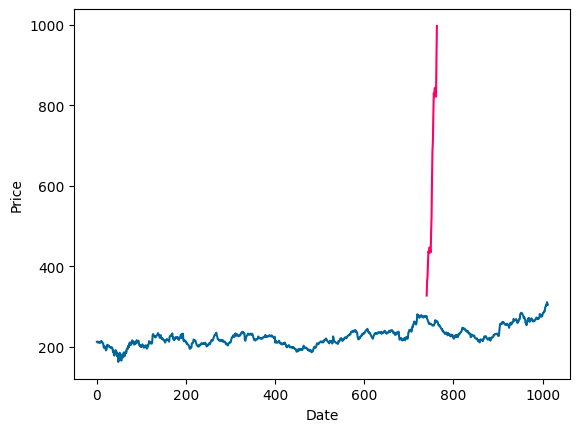

In [20]:
plt.plot(y_true, label='Original', color='#006699');
plt.plot(y_hat, color='#ff0066', label='Forecast');
plt.ylabel('Price');
plt.xlabel('Date');
plt.show()